## Algoritimo Genetico

### Importação de Bibliotecas e Variaveis Globais

In [278]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

N   = 100
COL = 2

### Função para Geração do Público

In [279]:
def getX():
    return np.random.uniform(low = -10, high = 10, size = (N, COL))

### Função para criação do Ranking Linear

In [280]:
def getRanked(x): 
    MAX = 100
    MIN = 1
    birdFunc = lambda x,y: np.sin(x)*np.exp(np.power(1-np.cos(y), 2))+np.cos(y)*np.exp(np.power(1-np.sin(x), 2))+np.power((x-y), 2)

    list = []
    for it in x:
        list.append({
            'valor': birdFunc(it[0], it[1]),
            'x': it[0],
            'y': it[1],
        })
    list.sort(key=lambda x: x['valor'])
    list

    ranked = []
    for index, it in enumerate(x):
        curValue = math.floor(MIN + ((MAX - MIN) * (N - index - 1) / (N-1)))
        ranked.append({
            'rank': curValue,
            'object': list[index]
        })
    return ranked

### Função do Crossover para definição de Cruzamento

In [281]:

def crossover(ranked,taxa_cruzamento = 0.7):
    valores = [i['object']['valor'] for i in ranked]
    pesos = [i['rank'] for i in ranked]
    
    offspring = []
    for parent in [random.choices(range(N), weights=pesos, k=2) for ind in range(math.floor(N/2))]:
        alpha = random.random()
        if (random.random() <= taxa_cruzamento):
            x = (alpha * ranked[parent[0]]['object']['x'] + (1-alpha) * ranked[parent[1]]['object']['x'])
            y = (alpha * ranked[parent[0]]['object']['y'] + (1-alpha) * ranked[parent[1]]['object']['y'])
            offspring.append([x,y])
    
            x = (alpha * ranked[parent[1]]['object']['x'] + (1-alpha) * ranked[parent[0]]['object']['x'])
            y = (alpha * ranked[parent[1]]['object']['y'] + (1-alpha) * ranked[parent[0]]['object']['y'])
            offspring.append([x,y])
        else:
            x = (ranked[parent[0]]['object']['x'])
            y = (ranked[parent[0]]['object']['y'])
            offspring.append([x,y])

            x = (ranked[parent[1]]['object']['x'])
            y = (ranked[parent[1]]['object']['y'])
            offspring.append([x,y])

    return offspring

### Função para realização de Mutação 

In [282]:
def mutation(input,mutation_rate):
    mutacao = []
    for individ in input:
        if (random.random()<=mutation_rate):
            x = (individ[0] + random.uniform(-1,1))
            y = (individ[1] + random.uniform(-1,1))
            mutacao.append([x,y])
        else:
            mutacao.append([individ[0],individ[1]])
    return mutacao

### Função para realização do treinamento e contabilizaçao de acuracia

In [286]:
def fit(num_iterations,crossing_rate,mutation_rate,sample_size):
    
    input = getX()
    worst = []
    best  = []
    avg   = []

    for itert in range(num_iterations):
        input = getRanked(input)
        # print(input)
        result = [i['object']['valor'] for i in input]
        worst.append(result[len(result)-1])

        best.append(result[0])

        avg.append(sum(result)/N)

        input = crossover(input,crossing_rate)
        input = mutation(input,mutation_rate)

    birdFunc = lambda x,y: np.sin(x)*np.exp(np.power(1-np.cos(y), 2))+np.cos(y)*np.exp(np.power(1-np.sin(x), 2))+np.power((x-y), 2)
    return sum([birdFunc(it[0],it[1]) for it in input])/(-106.77*N),worst,best,avg,[input[0][0],input[0][1]]

### Execução do ajuste: Coordenadas do minimo,Acuracia e Gráfico com pior,melhor e a media do ajsute

Coord: x: -1.582115476470941, y: -3.1302419883902335
Acuracia: 0.9999488306489728


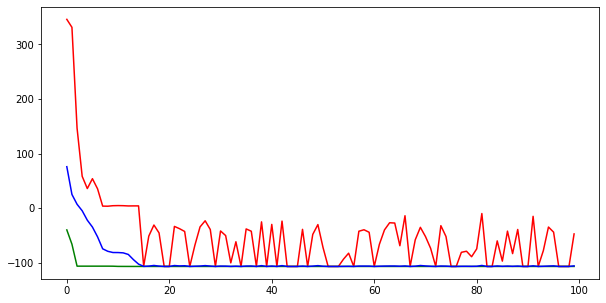

In [301]:
acuracia,worst,best,avg,coord = fit(100,0.6,0.01,100)

print(f'Coord: x: {coord[0]}, y: {coord[1]}')
print(f'Acuracia: {acuracia}')

plt.figure (figsize = (10, 5)) 
plt.plot(worst, 'r')
plt.plot(best,'g')
plt.plot(avg,'b')
plt.show()